In [1]:
import numpy as np
import pickle
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
LABELLED_DATA_FILE = 'data/all_label.p'
UNLABELED_DATA_FILE = 'data/all_unlabel.p'
TEST_DATA_FILE = 'data/test.p'

METHOD = 'cnn_supervised'

OUTPUT_FOLDER = 'output/'
MODEL_FOLDER = 'model/' + METHOD + '/'

In [3]:
import os
if not os.path.exists(MODEL_FOLDER):
    os.makedirs(MODEL_FOLDER)
if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

# Train

### Loading Training Data

In [4]:
labelled_data = np.array(pickle.load(open(LABELLED_DATA_FILE, 'rb')))
# unlabeled_data = np.array(pickle.load(open(UNLABELED_DATA_FILE, 'rb')))

In [10]:
# generate x, y from data
nb_labelled_data = 5000

X_train_label = labelled_data.reshape((nb_labelled_data, 3, 32, 32)).astype('float32') / 255

y_train_label_class = np.array([classIdx for classIdx in range(len(labelled_data)) for i in range(len(labelled_data[classIdx]))])
Y_train_label = np_utils.to_categorical(y_train_label_class, len(labelled_data))

y_train_label_5000_class = np.array(list(range(nb_labelled_data)))
Y_train_label_5000 = np_utils.to_categorical(y_train_label_5000class, nb_labelled_data)

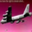

In [6]:
from scipy.misc import toimage
toimage(X_train_label[0])

In [27]:
# TODO: remove

from keras.datasets import cifar10

(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data()

# X_train_reshaped = np.array([[img[:, :, 0], img[:, :, 1], img[:, :, 2]] for img in X_train]) / 255.0
X_test_cifar = np.array([[img[:, :, 0], img[:, :, 1], img[:, :, 2]] for img in X_test_cifar]) / 255.0
Y_test_cifar = np_utils.to_categorical(y_test_cifar.flatten(), 10)

### Training

In [30]:
batch_size = 64
nb_classes = 5000
nb_epoch = 100
img_rows, img_cols, img_channels = 32, 32, 3
# nb_filters = [32, 64]
# nb_nodes = [512]

In [47]:
model = Sequential()

model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=X_train_label.shape[1:], dim_ordering="th"))
model.add(Activation('relu'))
# model.add(Convolution2D(64, 3, 3))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3, border_mode='same', dim_ordering="th"))
model.add(Activation('relu'))
# model.add(Convolution2D(64, 3, 3))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
model.fit(X_train_label, Y_train_label_5000,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
#           validation_data=(X_test_cifar, Y_test_cifar),
#           validation_split=0.1,  # (X_train_label, Y_train_label),
          shuffle=True)

# TODO: remove (X_test_reshaped, Y_test_categ)

Epoch 1/100
5000/5000 [==============================] - 1s - loss: 8.5351 - acc: 0.0000e+00     
Epoch 2/100
5000/5000 [==============================] - 1s - loss: 8.5208 - acc: 0.0000e+00     
Epoch 3/100
5000/5000 [==============================] - 1s - loss: 8.5209 - acc: 0.0000e+00     
Epoch 4/100
5000/5000 [==============================] - 1s - loss: 8.5211 - acc: 0.0000e+00     
Epoch 5/100
5000/5000 [==============================] - 1s - loss: 8.5208 - acc: 0.0000e+00     
Epoch 6/100
5000/5000 [==============================] - 1s - loss: 8.5212 - acc: 0.0000e+00     
Epoch 7/100
5000/5000 [==============================] - 1s - loss: 8.5210 - acc: 2.0000e-04     
Epoch 8/100
5000/5000 [==============================] - 1s - loss: 8.5211 - acc: 0.0000e+00     
Epoch 9/100
5000/5000 [==============================] - 1s - loss: 8.5208 - acc: 0.0000e+00     
Epoch 10/100
5000/5000 [==============================] - 1s - loss: 8.5175 - acc: 2.0000e-04     
Epoch 11/100
5000/5

In [12]:
model_name = (METHOD
    + '_filter-32w3-64w3-512'
    + '_epo-100' # + str(nb_epoch)
    + '_test-0.3683'
)

model.save(MODEL_FOLDER + model_name)

# Test

### Loading test data 

In [17]:
test_data = pickle.load(open(TEST_DATA_FILE, 'rb'))  # dict
X_test = np.array(test_data['data']).reshape((10000, 3, 32, 32)).astype('float32') / 255

### Predict

In [23]:
result_5000 = model.predict_classes(X_test)
result = (result_5000 / 500).astype(int)

 9920/10000 [============================>.] - ETA: 0s

In [24]:
result

array([5, 1, 0, ..., 2, 7, 6])

In [ ]:
csv_content = list(zip(test_data['ID'], result.tolist()))
np.savetxt(OUTPUT_FOLDER + model_name + ".csv", csv_content, fmt="%i", header="ID,class", comments="", delimiter=",")

In [49]:
Y_test_class_predict = (model.predict_classes(X_test_cifar) / 500).astype(int)
np.sum(Y_test_class_predict == y_test_cifar.flatten()) / len(y_test)

10000/10000 [==============================] - 1s     


0.14249999999999999